# LABB 1

### Planen
Min plan med den här labben är att i samverkan med olika verktyg lära mig och klara av denna labb, några av verktygen jag kommer att använda är bla:
- ChatGPT
- W3School
- Stackoverflow
- Kokchungs Code Alongs/Exercises och allmäna kunskap

eftersom jag inte har skrivit i Python innan så kommer dessa verktyg bli användna flitigt, det jag kommer att lägga vikt bakom är att lära mig vad exakt det är jag skriver och vad det gör i syfte med detta så kommer jag att lägga kommentarer på allting med tanken att kunna visa att jag faktiskt vet vad koden innebär och dess struktur!

### Arbetssätt
Mitt arbetssätt kommer vara att starta med dom fantastiska verktygen vi har fått inom denna kurs, jag kommer med en stark sannolikhet inte att ladda upp excersies förräns jag känner att dom sitter, sedan kommer jag att använda W3School allteftersom frågor uppstår, för att slutligen fråga ChatGPT om jag har förstått det rätt och/eller hur jag kan förbättra min kod så i mitt huvud kan det visualiserars såhär:

- 1 Få en basisk förståelse
- 2 Arbeta och utveckla den förståelsen
- 3 När man har byggt en grund gå till lärare och/eller ChatGPT och få en bredare kunskap
- 4 Vid nöjd kunskap, ladda upp till Github
- 5 Go to 1

Tyvärr med detta så kommer det att många gånger kommer ChatGPT ha en bättre/smartare lösning än det jag har utvecklat från början, men med det så kommer en förståelse över hur jag kan utveckla min kod i framtiden!

Mina commits kommer antagligen att vara lite "matigare" men färre än dom andra i klassen med tanke på att jag sällan lämnar ett problem förräns jag faktiskt har löst det än att arbeta bitvis så ha det i åtanke!

# UPDATE

Med tanke på att vi fick en vecka till på denna labb, så kommer jag nu att dela upp mitt program i olika delar för att visa lite mera logiskt hur arbetsprocessen har sett ut och hur programmet fungerar i sig, även om vissa delar inte har någon direkt användning där och då!

---

#### Läs pichu-data och spara i lämplig datastruktur

Första delen i uppgiften (se bifogad PDF fil i Labb mappen) den största utmaningen i denna del var att börja lära mig hur Python fungerar VS C#, personligen uppskattar jag hur Python är skriven, det känns logiskt och rak på sak men många error meddelande är helt nytt så har fått lära mig mycket här, fick ett sk "Eureaka" moment på skip_header och började läsa på mera om hur man kan använda det i framtida projekt!


In [8]:
with open("../Labb1/pichu.txt", "r") as file:
    raw_text_pichu = file.readlines()

pichu_data = []  # Tom lista för att lagra pichu-data

skip_header = True  # Flagga för att hoppa över "headern"
for line in raw_text_pichu:
    if skip_header:  
        # Hoppa över "headern" eftersom den inte innehåller relevant data
        skip_header = False  # Avmarkera flaggan för att fortsätta bearbeta datan
        continue
    if line.strip().startswith("("):  
        # Lägg till den rengjorda datan i listan
        pichu_data.append((line))  

# Läs pikachu-data och spara i lämplig datastruktur
with open("../Labb1/pikachu.txt", "r") as file:
    raw_text_pikachu = file.readlines()

pikachu_data = []  

skip_header = True  
for line in raw_text_pikachu:
    if skip_header:  
        skip_header = False  
        continue
    if line.strip().startswith("("):  
        pikachu_data.append((line))


---
#### Plotta alla punkterna med olika färger i samma fönster

En av dom mera roliga delarna i denna labb, lärde mig om hur man kan lägga in data och sedan skriva ut det, bra lärdom om hur det finns olika moduler inom bla Python, hur man installerar det och använder det (i detta fall i en sk Virtual Enviroment"Venv") och hur bla matplotlib fungerar. Mycket experiment med bla item[0] för att testa och se hur det fungerar.


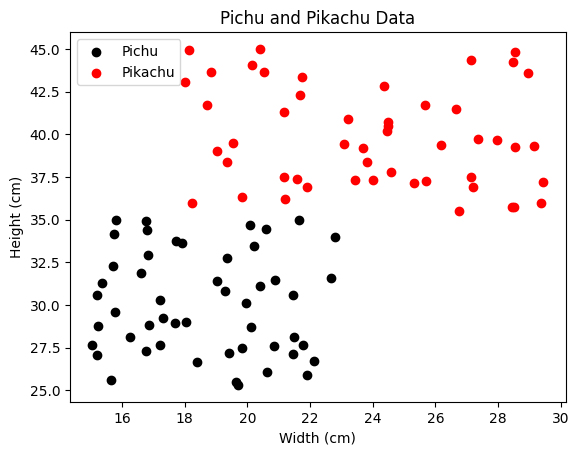

In [32]:

import matplotlib.pyplot as plt

# Läser och rengör datan 
def process_line(line):
    parts = line.strip().replace("(", "").replace(")", "").split(",")  # Tar bort paranteser och splittar vid komma.
    return [float(coord) for coord in parts]  # Konvertera till float och ger en lista

# Läser pichu-data och spara i lämplig datastruktur
with open("../Labb1/pichu.txt", "r") as file:
    raw_text_pichu = file.readlines()

pichu_data = []  
skip_header = True  
for line in raw_text_pichu:  
    if skip_header:  
        skip_header = False  
        continue
    if line.strip().startswith("("):  
        pichu_data.append(process_line(line)) #ChatGPT kommentar: Process line den hanterar varje rad av indata och returnerar en lista av floats.  

# Läser pikachu-data och spara i lämplig datastruktur
with open("../Labb1/pikachu.txt", "r") as file:
    raw_text_pikachu = file.readlines()

pikachu_data = []  
skip_header = True  
for line in raw_text_pikachu:  
    if skip_header:  
        skip_header = False  
        continue
    if line.strip().startswith("("):  
        pikachu_data.append(process_line(line))  

# Extrahera koordinaterna för pichu och pikachu alltså dom sk "breddkoordinationerna"
pichu_widths = [item[0] for item in pichu_data] 
pichu_heights = [item[1] for item in pichu_data]

pikachu_widths = [item[0] for item in pikachu_data]
pikachu_heights = [item[1] for item in pikachu_data]

# Plot pichu och pikachu data
plt.scatter(pichu_widths, pichu_heights, label="Pichu", color="black")
plt.scatter(pikachu_widths, pikachu_heights, label="Pikachu", color="red")

# Labeling av axlarna och titeln för plottet
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.title("Pichu and Pikachu Data")

# Visa legenden
plt.legend()

# Visa plottet
plt.show()


---
# Läser testpunkterna och sparar dem i lämplig datastruktur

In [ ]:
def process_line(line): #def process_line som line
    # Tar bort paranteser och splittar vid kommatecken, och konverterar till tal
    parts = line.strip().replace("(", "").replace(")", "").split(",")
    return [float(coord) for coord in parts]

def read_test_points(file_path):
    # Öppna filen och läser den som "rå" text
    with open(file_path, "r") as file:
        raw_test_points = file.readlines()

    test_points = []
    # Bearbeta varje rad i den råa texten för att skapa en lista av testpunkter
    for line in raw_test_points:
        test_points.append(process_line(line))  # Använd process_line för att konvertera varje rad till en testpunkt som vi definerade innan

    return test_points

# Läser in testpunkter från filen
test_points = read_test_points("../Labb1/test_points.txt")

# Skriv ut testpunkterna för att kontrollera att de lästes in korrekt
print("Testpunkter:")
for point in test_points:
    print(point)


---
### Beräkna avstånd mellan testpunkt och övriga punkter

Den här delen fastnade jag på lite för länge, det kändes i början som en av dom lättare uppgifterna men det var här jag märkte att jag behövde repetera mera, fick många string mot float errors mm som jag tog stor kunskap av, efter många om och men så lyckas jag att skriva ut ALL Pichu och Pikachu data jämför med i distans av testpunkterna. Fick mycket hjälp av ChatGPT i denna del men har förstått och lärt mig av det.

In [10]:
import math

# Läser och rengör datan 
def process_line(line):
    parts = line.strip().replace("(", "").replace(")", "").split(",")  # Tar bort paranteser och splittar vid komma.
    return [float(coord) for coord in parts]  # Konvertera till float och ger en lista

# Funktion för att beräkna avståndet mellan två punkter
def calculate_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Läser pichu-data och sparar i lämplig datastruktur
with open("../Labb1/pichu.txt", "r") as file:
    raw_text_pichu = file.readlines()

pichu_data = []  
skip_header = True  
for line in raw_text_pichu:  
    if skip_header:  
        skip_header = False  
        continue
    if line.strip().startswith("("):  
        pichu_data.append(process_line(line))  

# Läser pikachu-data och sparar i lämplig datastruktur
with open("../Labb1/pikachu.txt", "r") as file:
    raw_text_pikachu = file.readlines()

pikachu_data = []  
skip_header = True  
for line in raw_text_pikachu:  
    if skip_header:  
        skip_header = False  
        continue
    if line.strip().startswith("("):  
        pikachu_data.append(process_line(line))  

# Funktion för att läsa in testpunkter från en fil och spara dem i lämplig datastruktur
def read_test_points(file_path):
    with open(file_path, "r") as file:
        raw_test_points = file.readlines()

    test_points = []
    for line in raw_test_points:
        if line.strip().startswith("("):
            test_points.append(process_line(line))

    return test_points

# Läser in testpunkter från filen
test_points = read_test_points("../Labb1/test_points.txt")

# Funktion för att beräkna avstånden mellan varje testpunkt och övriga punkter (pichu och pikachu)
def calculate_distances(test_points, data_points):
    distances = []
    for test_point in test_points:
        point_distances = []
        for data_point in data_points:
            distance = calculate_distance(test_point, data_point)
            point_distances.append(distance)
        distances.append(point_distances)
    return distances

# Beräkna avstånden mellan testpunkterna och pichu/pikachu
test_distances_pichu = calculate_distances(pichu_data, test_points)
test_distances_pikachu = calculate_distances(pikachu_data, test_points)

# Skriv ut avstånden för att kontrollera
for i, (distances_pichu, distances_pikachu) in enumerate(zip(test_distances_pichu, test_distances_pikachu)):
    print(f"Avstånd för testpunkt {i + 1} till Pichu: {distances_pichu}")
    print(f"Avstånd för testpunkt {i + 1} till Pikachu: {distances_pikachu}")


Avstånd för testpunkt 1 till Pichu: [7.970343657737193]
Avstånd för testpunkt 1 till Pikachu: [12.08810960061184]
Avstånd för testpunkt 2 till Pichu: [12.590719877292956]
Avstånd för testpunkt 2 till Pikachu: [6.704642780751213]
Avstånd för testpunkt 3 till Pichu: [10.703667243488669]
Avstånd för testpunkt 3 till Pikachu: [4.537268592275223]
Avstånd för testpunkt 4 till Pichu: [8.238702578317296]
Avstånd för testpunkt 4 till Pikachu: [5.205574623435524]
Avstånd för testpunkt 5 till Pichu: [5.40975647255134]
Avstånd för testpunkt 5 till Pikachu: [3.9861946561561314]
Avstånd för testpunkt 6 till Pichu: [6.026023535238124]
Avstånd för testpunkt 6 till Pikachu: [2.350982579235108]
Avstånd för testpunkt 7 till Pichu: [8.76900128887166]
Avstånd för testpunkt 7 till Pikachu: [6.594038167893765]
Avstånd för testpunkt 8 till Pichu: [9.690755956981391]
Avstånd för testpunkt 8 till Pikachu: [6.147288121451508]
Avstånd för testpunkt 9 till Pichu: [10.671232402962213]
Avstånd för testpunkt 9 till P

---
### Närmaste punkten tillhör Pichu? om JA klassificera testpunkt som Pichu om NEJ klassificera testpunkt som pikachu.

Efter att ha slagit huvudet mot väggen från den tidigare uppgiften och all kunskap jag plockade upp där så var den här utmanande men rolig! Fick ta till hjälp av ChatGPT i denna men fick en stark förståelse och kunskap över detta!

Som en extra utmaning så lägger jag in 3st slumpmässiga tal för att lättare testa programmet!

In [9]:
import random
import math

# Beräkna avståndet mellan två punkter
def distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def pokemon_data(user_point, pichu_data, pikachu_data):
    # Beräkna avståndet till varje punkt i Pichu-datasetet från testpunkten
    distances_to_pichu = [distance(user_point[0], user_point[1], p[0], p[1]) for p in pichu_data]
    
    # Beräkna avståndet till varje punkt i Pikachu-datasetet från testpunkten
    distances_to_pikachu = [distance(user_point[0], user_point[1], p[0], p[1]) for p in pikachu_data]
    
    # Hitta det minsta avståndet till Pichu
    min_distance_to_pichu = min(distances_to_pichu)
    
    # Hitta det minsta avståndet till Pikachu
    min_distance_to_pikachu = min(distances_to_pikachu)
    
    # Om det minsta avståndet till Pichu är mindre än det minsta avståndet till Pikachu, klassificera som Pichu
    if min_distance_to_pichu < min_distance_to_pikachu:
        return "Pichu"
    # Annars klassificera som Pikachu
    else:
        return "Pikachu"

# Rensa och bearbeta varje rad av data
def process_line(line):
    parts = line.strip().replace("(", "").replace(")", "").split(",")
    return [float(coord) for coord in parts]

# Läs och bearbeta Pichu-data från filen
with open("../Labb1/pichu.txt", "r") as file:
    raw_text_pichu = file.readlines()

pichu_data = []  
skip_header = True  
for line in raw_text_pichu:  
    if skip_header:  
        skip_header = False  
        continue
    if line.strip().startswith("("):  
        pichu_data.append(process_line(line))  

# Läs och bearbeta Pikachu-data från filen
with open("../Labb1/pikachu.txt", "r") as file:
    raw_text_pikachu = file.readlines()

pikachu_data = []  
skip_header = True  
for line in raw_text_pikachu:  
    if skip_header:  
        skip_header = False  
        continue
    if line.strip().startswith("("):  
        pikachu_data.append(process_line(line)) 

# Generera 3 slumpmässiga testpunkter
user_points = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(3)]

# Klassificera och skriv ut resultatet för varje testpunkt
for i, user_point in enumerate(user_points):
    Pokemon = pokemon_data(user_point, pichu_data, pikachu_data)
    print(f"Random number {i + 1}: {user_point} klassificeras som {Pokemon}")


Random number 1: (8.5804539465974, 55.926636699321165) klassificeras som Pikachu
Random number 2: (45.074829530943795, 99.4402335552619) klassificeras som Pikachu
Random number 3: (54.79514330091655, 24.567270130819562) klassificeras som Pikachu


---
### Låt användaren mata in en testpunkt och avgör om den dess klass. Ta med felhanteringen som tar hand om negativa tal och icke-numeriska inputs. Se till att ha användarvänliga felmeddelanden.

Fortsatt arbete på uppgifterna där jag kombinerar dom tidigare utmaningarna, har varit extra vaken på lektionerna så user input gick smidigt!

In [3]:
import math

# Beräkna avståndet mellan två punkter
def distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def pokemon_data(test_point, pichu_data, pikachu_data):
    # Beräkna avståndet till varje punkt i Pichu från punkten
    distances_to_pichu = [distance(test_point[0], test_point[1], p[0], p[1]) for p in pichu_data]
    
    # Beräkna avståndet till varje punkt i Pikachu från punkten
    distances_to_pikachu = [distance(test_point[0], test_point[1], p[0], p[1]) for p in pikachu_data]
    
    # Hitta det minsta avståndet till Pichu
    min_distance_to_pichu = min(distances_to_pichu)
    
    # Hitta det minsta avståndet till Pikachu
    min_distance_to_pikachu = min(distances_to_pikachu)
    
    # Om det minsta avståndet till Pichu är mindre än det minsta avståndet till Pikachu, blir det en Pichu
    if min_distance_to_pichu < min_distance_to_pikachu:
        return "Pichu"
    # Annars blir det Pikachu
    else:
        return "Pikachu"

# Rensa av data
def process_line(line):
    parts = line.strip().replace("(", "").replace(")", "").split(",")
    return [float(coord) for coord in parts]

# Läs Pichu från filen
with open("../Labb1/pichu.txt", "r") as file:
    raw_text_pichu = file.readlines()

pichu_data = []  
skip_header = True  
for line in raw_text_pichu:  
    if skip_header:  
        skip_header = False  
        continue
    if line.strip().startswith("("):  
        pichu_data.append(process_line(line))  

# Bearbeta Pikachu från filen
with open("../Labb1/pikachu.txt", "r") as file:
    raw_text_pikachu = file.readlines()

pikachu_data = []  
skip_header = True  
for line in raw_text_pikachu:  
    if skip_header:  
        skip_header = False  
        continue
    if line.strip().startswith("("):  
        pikachu_data.append(process_line(line)) 


def get_user_input():
    # Loopar tills användaren gör rätt!
    while True:
        try:
            # Försöker konvertera användarinput till float(siffra)
            x = float(input("Ange x-koordinaten för testpunkten: "))
            y = float(input("Ange y-koordinaten för testpunkten: "))
            # Kontrollerar om x och y är negativa
            if x < 0 or y < 0:
                print("Koordinaterna kan inte vara negativa. Försök igen.")
                continue
            # Returnerar X och Y om allt är rätt
            return x, y
        # Fångar upp ValueError som uppstår om användaren ger något annat än en siffra
        except ValueError:
            # Skriver ut felmeddelande och fortsätter loopen
            print("Endast siffror är tillåtna. Försök igen.")

# Hämta punkten från användaren
test_point = get_user_input()

# Klassificera och skriv ut resultatet för testpunkten
Pokemon = pokemon_data(test_point, pichu_data, pikachu_data)
print(f"Whos that Pokemon? Its {Pokemon}!") 


Koordinaterna kan inte vara negativa. Försök igen.
Endast siffror är tillåtna. Försök igen.
Endast siffror är tillåtna. Försök igen.
Endast siffror är tillåtna. Försök igen.
Endast siffror är tillåtna. Försök igen.
Whos that Pokemon? Its Pichu!


---
### Den approachen vi använt med närmaste punkten kan klassificera fel när punkterna för respektive klass går in i varandra. Nu ska du istället välja de fem närmaste punkterna till din testpunkt. Den klass testpunkten tillhör avgörs av majoritetsklassen av de närmaste punkterna.

Eftersom detta är 4:e gången jag skriver om denna kod från grunden pga att jag har haft olika tolkningar på hur slutresultatet bör bli så kommer jag uttnytja ChatGPT mycket till denna del för att spara på tid, kommentarer läggs för att visa förståelse och kunskap.

In [39]:
import math

# Beräkna avståndet mellan två punkter
def distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def pokemon_data(user_point, pichu_data, pikachu_data):
    # Beräkna avståndet från testpunkten till varje Pichu- och Pikachu-punkt
    distances_to_pichu = [distance(user_point[0], user_point[1], p[0], p[1]) for p in pichu_data]
    distances_to_pikachu = [distance(user_point[0], user_point[1], p[0], p[1]) for p in pikachu_data]
    
    # Kombinera avstånden till både Pichu och Pikachu
    combined_distances = list(zip(distances_to_pichu, distances_to_pikachu))
    
    # Sortera avstånden baserat på det totala avståndet till varje punkt
    combined_distances.sort(key=lambda x: sum(x))
    
    # Välj de fem närmaste punkterna oavsett klass
    closest_points = combined_distances[:5]
    
    # Räkna antalet närmaste punkter som tillhör varje klass
    count_pichu = sum(1 for distance in closest_points if distance[0] < distance[1])
    count_pikachu = 5 - count_pichu  # Eftersom det finns totalt 5 närmaste punkter
    
    # Välj den klass som har flest närmaste punkter
    if count_pichu > count_pikachu:
        return "Pichu"
    elif count_pikachu > count_pichu:
        return "Pikachu"
    else:
        # Om det är lika många närmaste punkter från båda klasser, välj "Oavgjort"
        return "Oavgjort"

# Rensa och bearbeta varje rad av data
def process_line(line):
    parts = line.strip().replace("(", "").replace(")", "").split(",")
    return [float(coord) for coord in parts]

# Läs Pichu-data från filen
with open("../Labb1/pichu.txt", "r") as file:
    raw_text_pichu = file.readlines()

pichu_data = []  
skip_header = True  
for line in raw_text_pichu:  
    if skip_header:  
        skip_header = False  
        continue
    if line.strip().startswith("("):  
        pichu_data.append(process_line(line))  

# Bearbeta Pikachu-data från filen
with open("../Labb1/pikachu.txt", "r") as file:
    raw_text_pikachu = file.readlines()

pikachu_data = []  
skip_header = True  
for line in raw_text_pikachu:  
    if skip_header:  
        skip_header = False  
        continue
    if line.strip().startswith("("):  
        pikachu_data.append(process_line(line)) 


def input_user():
    # Loopa tills användaren ger giltig inmatning
    while True:
        try:
            # Försök konvertera användarinput till float(siffror)
            x = input("Ange x-koordinaten för testpunkten: ").replace(",", ".") # ChatGPT hjälp för att få in bla komma tecken och punkt!
            y = input("Ange y-koordinaten för testpunkten: ").replace(",", ".")
            x = float(x)
            y = float(y)
            # Kontrollera om x och y är negativa
            if x < 0 or y < 0:
                print("Koordinaterna kan inte vara negativa. Försök igen.")
                continue
            # Returnera X och Y om allt är giltigt
            return x, y
        
        except ValueError:
            # Skriv ut felmeddelande och fortsätt loopen
            print("Endast siffror!")

# Hämta testpunkten från användaren
user_point = input_user()

# Avgör klassen för testpunkten med majoritetsröstning baserat på de fem närmaste punkterna
what_pokemon = pokemon_data(user_point, pichu_data, pikachu_data)
print(f"Whos that Pokemon? Its {what_pokemon}!")


Whos that Pokemon? Its Pichu!


---
#### Dela in ursprungsdatan slumpmässigt så att:
#### - 90 är träningsdata (45 Pikachu, 45 Pichu)
#### - 10 är testdata (5 Pikachu, 5 Pichu) CHATGPT EDITION (TM)

Hade stora problem att både lösa och förstå denna uppgift, alltså om det ska använda träningsdatan ifrån tidigare uppgifter eller om skapa min egna osv, lärde mig mycket utanför just denna uppgift dock och har tagit det till mig, efter ett givande och pedagogiskt möte med min lärare så trillade poletten ner, tyvärr så kommer detta stycke att innehålla mycket från ChatGPT med tanke på tidspressen men känner en liten "level up" känsla efter detta, mycket kunskap är tagen och även fått en starkare känsla av hur jag bör studera för att få en starkare förståelse!

La koncentration på att inte upprepa index för sin textdata plus att skriva ut den i korrekt format.

In [34]:
import random

def select_random_indices(indices, sample_count):
    # Slumpmässigt välj sample_count index utan att upprepa dem
    selected_indices = random.sample(indices, sample_count)
    return selected_indices

# Skapa listor med index för både Pichu och Pikachu
pichu_indices = list(range(len(pichu_data)))
pikachu_indices = list(range(len(pikachu_data)))

# Antal punkter som ska väljas för testdata (5 Pikachu, 5 Pichu)
test_sample_count = 5

# Välj slumpmässiga index för både Pichu och Pikachu
selected_pichu_indices = select_random_indices(pichu_indices, test_sample_count)
selected_pikachu_indices = select_random_indices(pikachu_indices, test_sample_count)

# Samla de valda punkterna för testdata
test_pichu = [(i, pichu_data[i]) for i in selected_pichu_indices]
test_pikachu = [(i, pikachu_data[i]) for i in selected_pikachu_indices]

print("Testdata för Pichu:")
for index, point in test_pichu:
    print(f"Index: {index}, Data: {point}")

print("Testdata för Pikachu:")
for index, point in test_pikachu:
    print(f"Index: {index}, Data: {point}")


Testdata för Pichu:
Index: 31, Data: [21.45702618619504, 30.61368134163151]
Index: 43, Data: [17.223788824880735, 30.29114345099137]
Index: 1, Data: [16.749103798428827, 34.895233506365955]
Index: 25, Data: [15.200086041781336, 27.095070307714877]
Index: 42, Data: [15.808011435277834, 34.96121380240097]
Testdata för Pikachu:
Index: 4, Data: [20.541578465304983, 43.613491047618304]
Index: 11, Data: [26.180524428318897, 39.38100083914504]
Index: 27, Data: [27.3435177435667, 39.726710263117944]
Index: 15, Data: [24.44364396490554, 40.175758410355904]
Index: 35, Data: [20.41381276067635, 44.992824684127264]


---
#### Beräkna Nogrannheten CHATGPT EDITION (TM)



In [51]:
import random
import math

# Beräkna avståndet mellan två punkter
def distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Förutsäg Pokemon-klassen för en given punkt baserat på avstånden till närmaste grannar
def predict_pokemon_class(point, pichu_data, pikachu_data):
    # Beräkna avståndet från testpunkten till varje Pichu- och Pikachu-punkt
    distances_to_pichu = [distance(point[0], point[1], p[0], p[1]) for p in pichu_data]
    distances_to_pikachu = [distance(point[0], point[1], p[0], p[1]) for p in pikachu_data]
    
    # Jämför avstånden för att bestämma klassen
    count_pichu = sum(1 for d in distances_to_pichu if d < min(distances_to_pikachu))
    count_pikachu = sum(1 for d in distances_to_pikachu if d < min(distances_to_pichu))
    
    # Returnera klassen med flest närmaste punkter
    if count_pichu > count_pikachu:
        return "Pichu"
    elif count_pikachu > count_pichu:
        return "Pikachu"
    else:
        return "Oavgjort"

# Beräkna noggrannheten baserat på TP, TN, FP, FN
def calculate_accuracy(test_pichu, test_pikachu, pichu_data, pikachu_data):
    TP = 0  # True Positives
    TN = 0  # True Negatives
    FP = 0  # False Positives
    FN = 0  # False Negatives
    
    # Förutspå klass för testdata för Pichu
    for index, point in test_pichu:
        predicted_class = predict_pokemon_class(point, pichu_data, pikachu_data)
        actual_class = "Pichu" if index in selected_pichu_indices else "Pikachu"
        if predicted_class == actual_class:
            if predicted_class == "Pichu":
                TP += 1
            else:
                TN += 1
        else:
            if predicted_class == "Pichu":
                FP += 1
            else:
                FN += 1
    
    # Förutspå klass för testdata för Pikachu
    for index, point in test_pikachu:
        predicted_class = predict_pokemon_class(point, pichu_data, pikachu_data)
        actual_class = "Pichu" if index in selected_pichu_indices else "Pikachu"
        if predicted_class == actual_class:
            if predicted_class == "Pikachu":
                TP += 1
            else:
                TN += 1
        else:
            if predicted_class == "Pichu":
                FN += 1
            else:
                FP += 1
    
    # Beräkna noggrannheten
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    return accuracy

# Funktion för att slumpmässigt välja index utan att upprepa dem
def select_random_indices(indices, sample_count):
    selected_indices = random.sample(indices, sample_count)
    return selected_indices

# Hämta testdata för Pichu och Pikachu
test_sample_count = 5
selected_pichu_indices = select_random_indices(range(len(pichu_data)), test_sample_count)
selected_pikachu_indices = select_random_indices(range(len(pikachu_data)), test_sample_count)
test_pichu = [(i, pichu_data[i]) for i in selected_pichu_indices]
test_pikachu = [(i, pikachu_data[i]) for i in selected_pikachu_indices]

# Beräkna noggrannheten
accuracy = calculate_accuracy(test_pichu, test_pikachu, pichu_data, pikachu_data)
print("Accuracy:", accuracy)


Accuracy: 0.9
